Importing necessary libraries

In [ ]:
import numpy as np # For numerical calculations
import pandas as pd # For creating data frame
import matplotlib.pyplot as plt # For data Visualization
import seaborn as sb # For data Visualization
from sklearn import preprocessing # For data preprocessing
from sklearn.preprocessing import LabelEncoder # For converting categoical values to numerical
from sklearn.preprocessing import StandardScaler,MinMaxScaler # For feature scaling
from sklearn.linear_model import LogisticRegression # Algorithm for creating model
from sklearn.model_selection import train_test_split # Splitting of the data
from sklearn.metrics import f1_score # For calculating f1-score
from sklearn.metrics import precision_score # For calculating pecision_score
from sklearn.metrics import mean_squared_error # For calculating MSE
from sklearn.metrics import mean_absolute_error # For calculating MAE

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Python_CSV files/

/content/drive/My Drive/Python_CSV files


Loading The Dataset

In [ ]:
df=pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv") # Used for reading  the csv file

In [ ]:
df.head() # Retrieves the first 5 rows from the dataframe

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [ ]:
df.shape # Used for checking the number of rows and columns in the dataframe

(3000, 14)

In [ ]:
df.dtypes # Used for checking the datatypes of attributes in the dataframe

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [ ]:
df.columns # Used for checking the columns in the dataframe

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [ ]:
df.info # Used to check the information of whole dataframe.

<bound method DataFrame.info of         Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms roof  \
0        1          339       6          5            4           6   NO   
1        2          358       5          4            3           4  YES   
2        3          324       7          5            4           5  YES   
3        4          330       6          4            3           5  YES   
4        5          320       7          4            4           5   NO   
...    ...          ...     ...        ...          ...         ...  ...   
2995  2996          341       9          6            5           7  YES   
2996  2997          292       9          8            7           8  YES   
2997  2998          328       7          4            3           5   NO   
2998  2999          293       9          7            7           8   NO   
2999  3000          343       7          6            6           8   NO   

      Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expect

Checking For missing values in the dataset

In [ ]:
df.isnull().sum() # Used for checking the null values in the dataset

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

Interpretation:

Here we found that dataset contains no missing values.

In [ ]:
df.describe() # Used to get mean,meadian,mode,max,min of all numerical data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [ ]:
df.dtypes # Checking the datatype of each column

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

1.1)Univariate Analysis:

Univariate Analysis on categorical columns

In [ ]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

Analysis of roof

In [ ]:
info_of_cat("roof") #function returns all the information required for the level 1 analysis

Unique values in roof are: ['NO' 'YES']
Mode of roof is YES
Number of missing values in roof is 0


([<matplotlib.patches.Wedge at 0x7fb3f321c670>,
 [Text(-0.04951561840336428, 1.0988849819403905, 'YES'),
  Text(0.049515515518326246, -1.0988849865763726, 'NO')],
 [Text(-0.027008519129107785, 0.599391808331122, '51.43%'),
  Text(0.027008463009996132, -0.5993918108598395, '48.57%')])

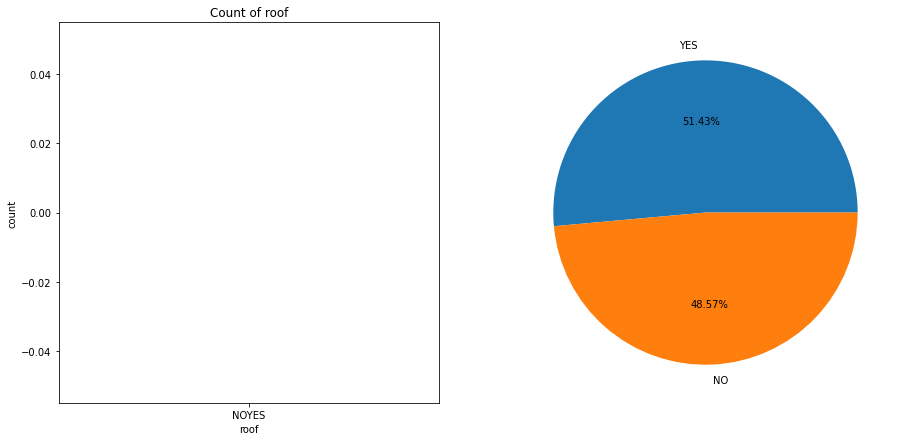

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of roof")                  # Set the title of the graph
percentage = df["roof"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["roof"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["roof"], ax = ax[0],order=['NO' 'YES'])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation:

1)From the above pie chart and count plot we can make out that 48.57% houses don't have roofs.

2) So this is the most important factor that can affect the grade of the house.

Analysis of Grade

In [ ]:
info_of_cat("Grade") #function returns all the information required for the level 1 analysis

Unique values in Grade are: ['D' 'C' 'B' 'A' 'E']
Mode of Grade is D
Number of missing values in Grade is 0


([<matplotlib.patches.Wedge at 0x7fb3f2d27d60>,
 [Text(0.26238675799559436, 1.0682477190373783, 'D'),
  Text(-1.0607085922171344, -0.29137138225423737, 'C'),
  Text(0.012670921643155142, -1.099927019281149, 'B'),
  Text(0.9219098060322013, -0.6000685873645355, 'A'),
  Text(1.096518097567199, -0.08745319724064353, 'E')],
 [Text(0.14312004981577872, 0.5826805740203881, '42.33%'),
  Text(-0.5785683230275278, -0.15892984486594763, '23.87%'),
  Text(0.0069114118053573495, -0.5999601923351721, '17.97%'),
  Text(0.5028598941993825, -0.3273101385624739, '13.30%'),
  Text(0.5981007804911994, -0.047701743949441926, '2.53%')])

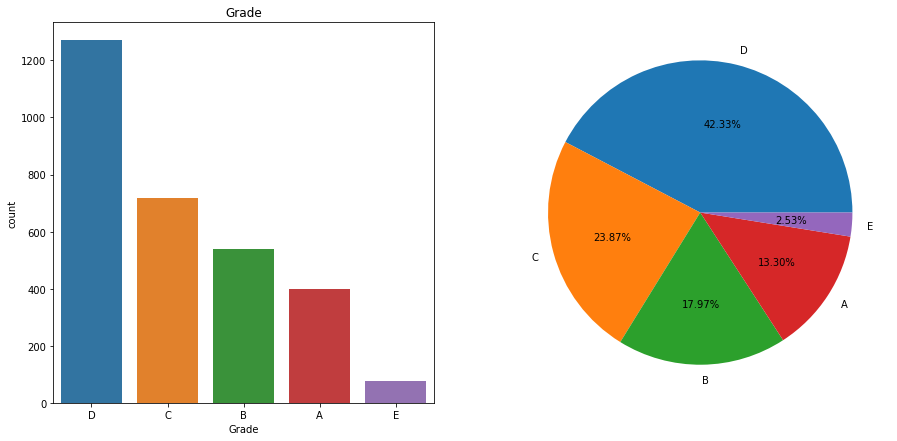

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Grade")                  # Set the title of the graph
percentage = df["Grade"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Grade"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Grade"], ax = ax[0],order=['D','C','B','A','E'])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpetation:

1) From pie chart and countplot we can notice that about 42.33% houses fall in the D grade category

2) 23.87% houses fall in the C grade category

3) 17.97% houses fall in the B grade category

4) 2.53% fall in E grade category

5) 13.30% houses fall in A grade category

From the above analysis we can make out that there are majority of houses that fall in D grade category

Analysis on numeric columns 

In [ ]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

Analysis of the Id:

In [ ]:
info_of_numerical("Id")

The mean of the Id is 1500.5
The median of the Id is 1500.5
The mode of the Id is 1
The standard deviation of the Id is 866.1697293256098
Number of missing values in the Id is 0


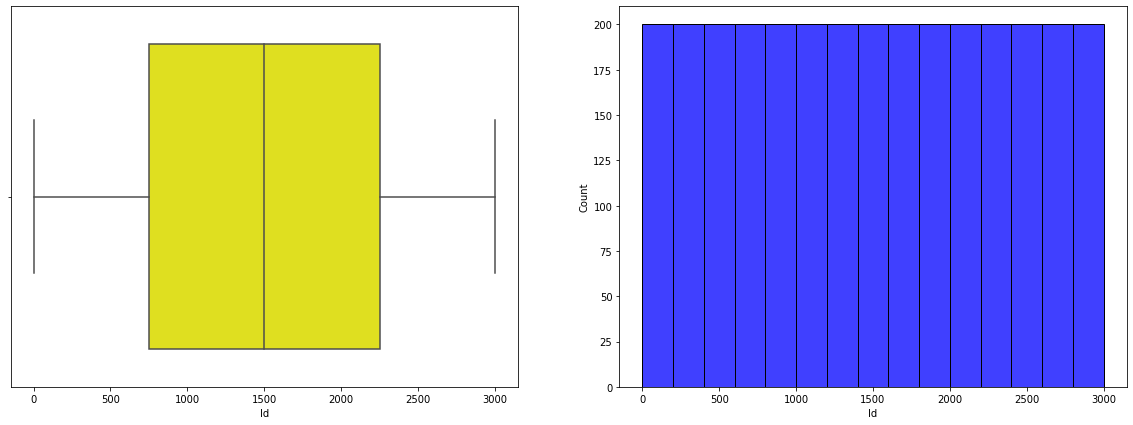

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Id"], ax =ax[1], color = "blue") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Id"], ax = ax[0], color = "yellow") # ax[0] means image will plot at the second space
plt.show()

Interpretation: Usually id follows the normal distribution.

Analysis of the Area(total):

In [ ]:
info_of_numerical("Area(total)")

The mean of the Area(total) is 325.117
The median of the Area(total) is 325.0
The mode of the Area(total) is 344
The standard deviation of the Area(total) is 20.507742444421382
Number of missing values in the Area(total) is 0


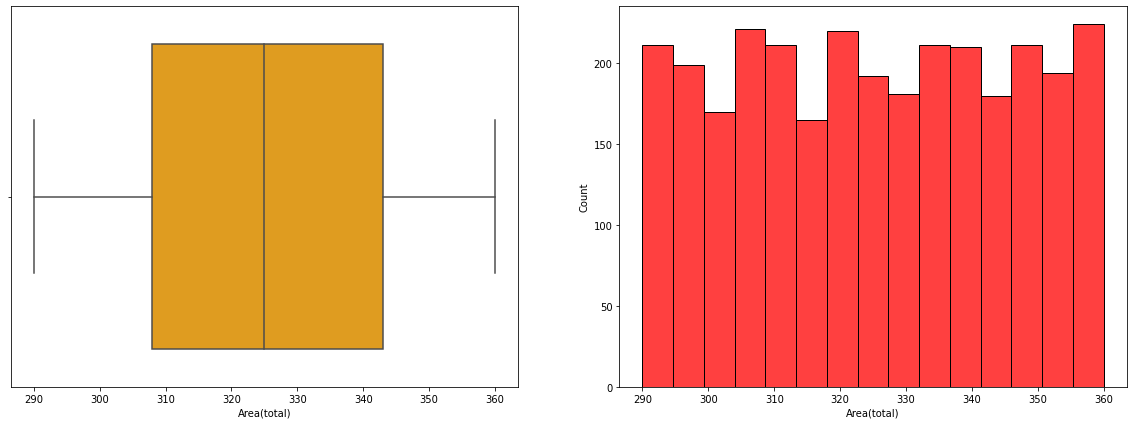

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Area(total)"], ax =ax[1], color = "red") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Area(total)"], ax = ax[0], color = "orange") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

 Area(total) of house follows normal distribution as there no houses whose area is more than 360 .


Analysis of the Trooms:

In [ ]:
info_of_numerical("Trooms")

The mean of the Trooms is 7.0216666666666665
The median of the Trooms is 7.0
The mode of the Trooms is 9
The standard deviation of the Trooms is 1.4212214860439663
Number of missing values in the Trooms is 0


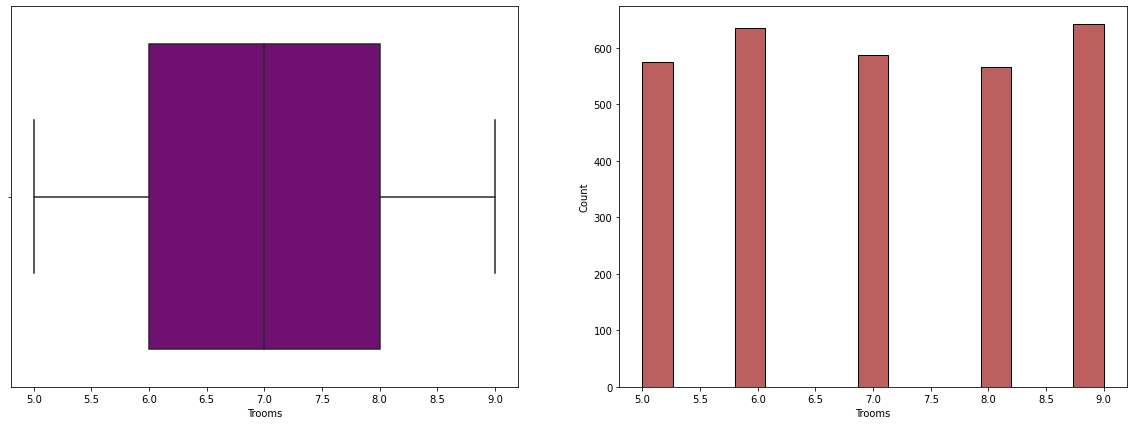

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Trooms"], ax =ax[1], color = "brown") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Trooms"], ax = ax[0], color = "purple") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

From the box plot and hist plot we can understand that majority of houses are having total of 9 rooms

Analysis of the Nbedrooms:

In [ ]:
info_of_numerical("Nbedrooms")

The mean of the Nbedrooms is 5.023
The median of the Nbedrooms is 5.0
The mode of the Nbedrooms is 4
The standard deviation of the Nbedrooms is 1.6348379833316555
Number of missing values in the Nbedrooms is 0


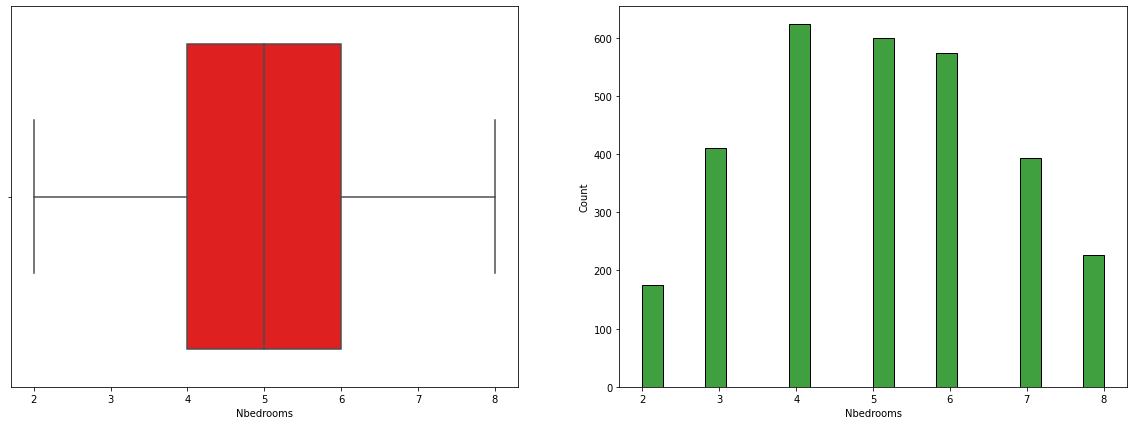

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Nbedrooms"], ax =ax[1], color = "green") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Nbedrooms"], ax = ax[0], color = "red") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

From the box plot and hist plot we can make out that total number of bedrooms are 4 in majority of houses 

Analysis of the Nbwashrooms:

In [ ]:
info_of_numerical("Nbwashrooms")

The mean of the Nbwashrooms is 4.5136666666666665
The median of the Nbwashrooms is 4.0
The mode of the Nbwashrooms is 4
The standard deviation of the Nbwashrooms is 1.7152630307459467
Number of missing values in the Nbwashrooms is 0


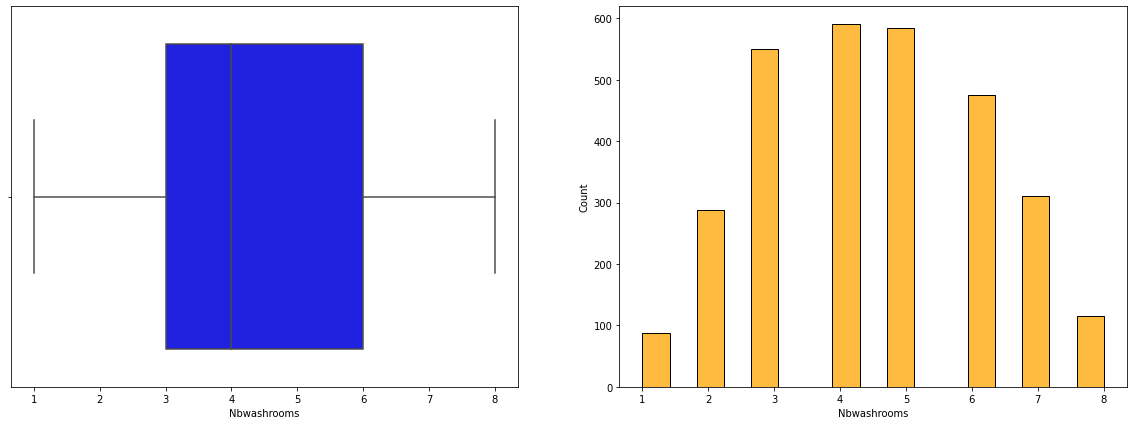

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Nbwashrooms"], ax =ax[1], color = "orange") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Nbwashrooms"], ax = ax[0], color = "blue") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

From the box plot and hist plot we can make out that total number of Nbwashrooms are 4 in majority of houses 

Analysis of the Twashrooms:

In [ ]:
info_of_numerical("Twashrooms")

The mean of the Twashrooms is 6.010666666666666
The median of the Twashrooms is 6.0
The mode of the Twashrooms is 5
The standard deviation of the Twashrooms is 1.786136328284218
Number of missing values in the Twashrooms is 0


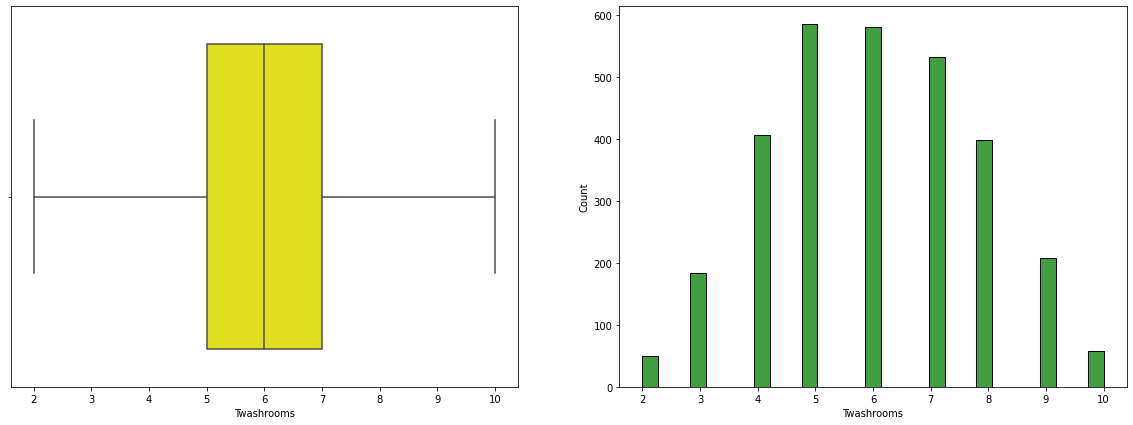

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Twashrooms"], ax =ax[1], color = "green") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Twashrooms"], ax = ax[0], color = "yellow") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

From the box plot and hist plot we can make out that total number of Twashrooms are 4 in majority of houses 

In [ ]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

Analysis on Roof(Area)

In [ ]:
info_of_numerical("Roof(Area)")

The mean of the Roof(Area) is 48.980666666666664
The median of the Roof(Area) is 71.0
The mode of the Roof(Area) is 0
The standard deviation of the Roof(Area) is 48.74664129867331
Number of missing values in the Roof(Area) is 0


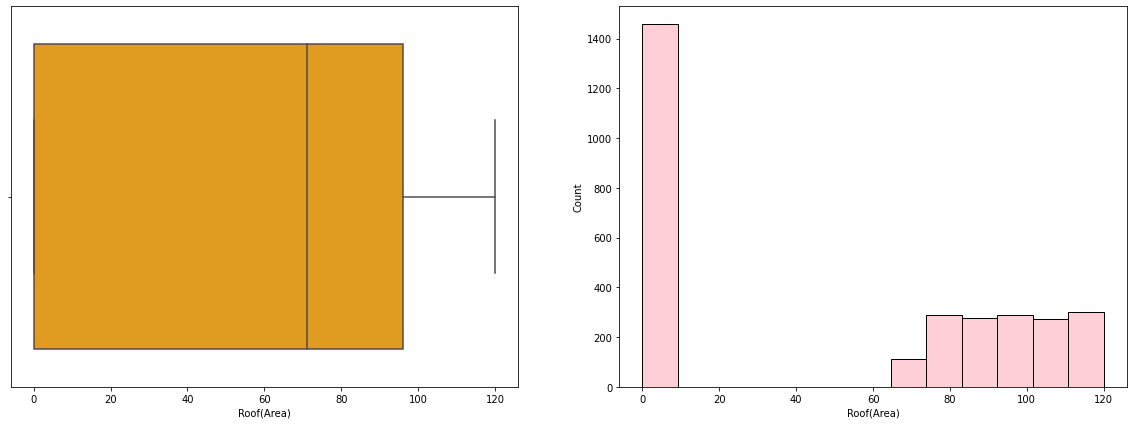

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Roof(Area)"], ax =ax[1], color = "pink") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Roof(Area)"], ax = ax[0], color = "orange") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

So from the above pie chart and boxplot we say that there is no roof area for majority of houses because majority of houses don't have roofs

Analysis on Lawn(Area)  

In [ ]:
info_of_numerical("Lawn(Area)")

The mean of the Lawn(Area) is 95.60933333333334
The median of the Lawn(Area) is 96.0
The mode of the Lawn(Area) is 101
The standard deviation of the Lawn(Area) is 14.83738843555085
Number of missing values in the Lawn(Area) is 0


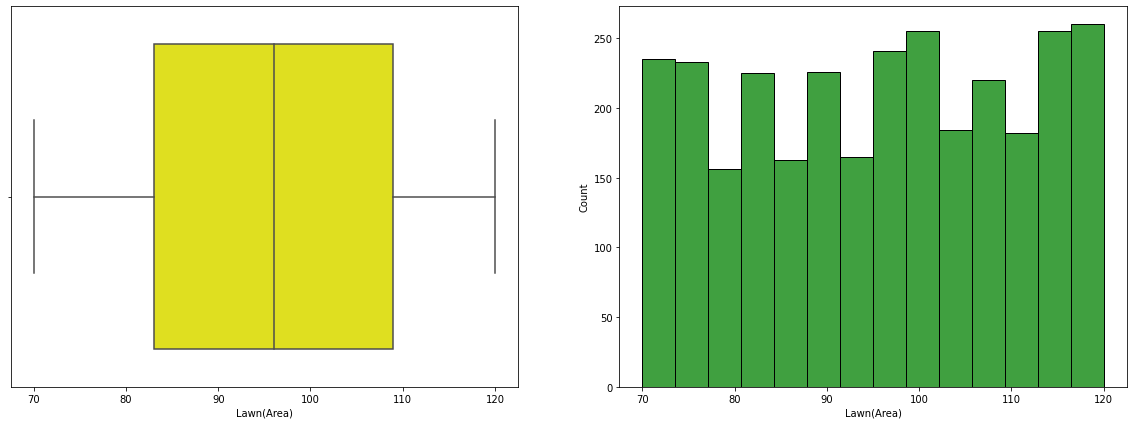

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Lawn(Area)"], ax =ax[1], color = "green") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Lawn(Area)"], ax = ax[0], color = "yellow") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

From the box plot and hist plot we can make out that on an average the Lawn(Area) for the houses is 96 and maximum is 101

Analysis on Nfloors 

In [ ]:
info_of_numerical("Nfloors")

The mean of the Nfloors is 4.013333333333334
The median of the Nfloors is 4.0
The mode of the Nfloors is 3
The standard deviation of the Nfloors is 1.6215317893903767
Number of missing values in the Nfloors is 0


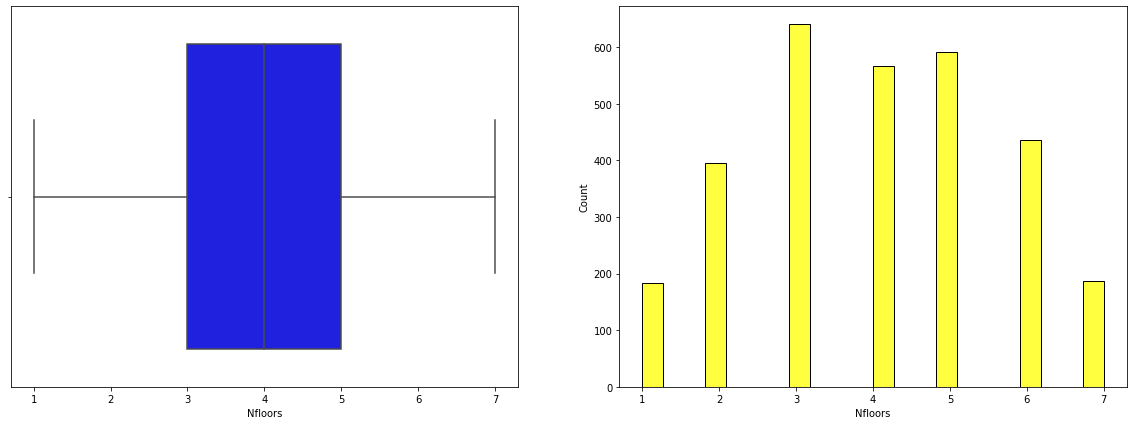

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Nfloors"], ax =ax[1], color = "yellow") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Nfloors"], ax = ax[0], color = "blue") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

From the box plot and hist plot we can make out that on an average the number of floors are 4 for the houses and maximum number of houses have 3 floors

In [ ]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

Analysis of API 

In [ ]:
info_of_numerical("API")

The mean of the API is 70.19066666666667
The median of the API is 70.0
The mode of the API is 77
The standard deviation of the API is 17.563460306410782
Number of missing values in the API is 0


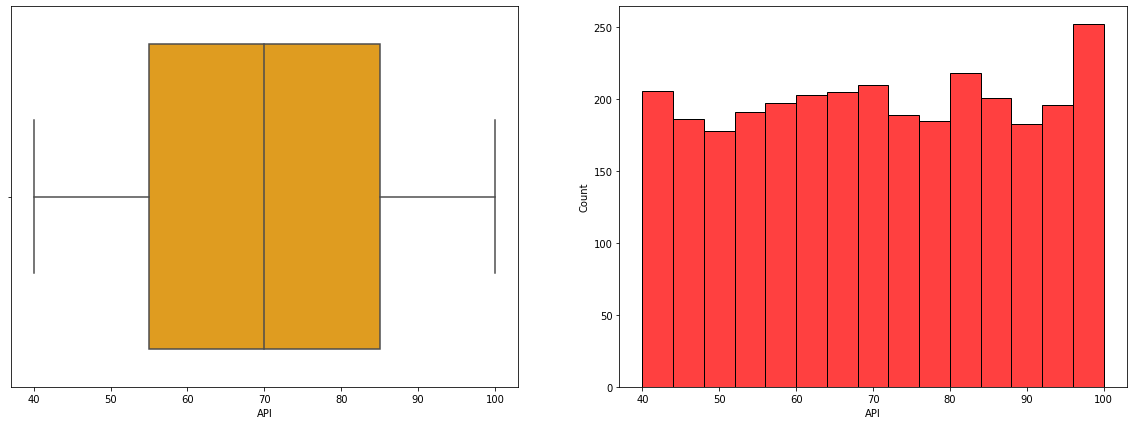

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["API"], ax =ax[1], color = "red") # ax[1] means image will plot at the second space
sb.boxplot(x = df["API"], ax = ax[0], color = "orange") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

From the box plot and hist plot we can make out that on an average the API is 70

Analysis of ANB   

In [ ]:
info_of_numerical("ANB")

The mean of the ANB is 3.479
The median of the ANB is 4.0
The mode of the ANB is 5
The standard deviation of the ANB is 1.6942596727222399
Number of missing values in the ANB is 0


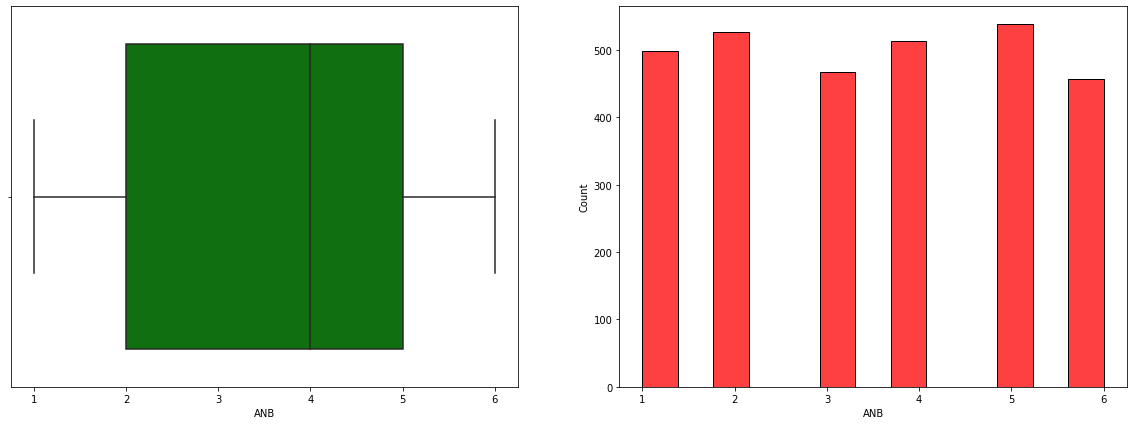

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["ANB"], ax =ax[1], color = "red") # ax[1] means image will plot at the second space
sb.boxplot(x = df["ANB"], ax = ax[0], color = "green") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

From the box plot and hist plot we can make out that for the most of the houses the ANB is 5

Analysis on Expected price 

In [ ]:
info_of_numerical("Expected price")

The mean of the Expected price is 3782.9383333333335
The median of the Expected price is 3771.0
The mode of the Expected price is 3335
The standard deviation of the Expected price is 567.1899952345073
Number of missing values in the Expected price is 0


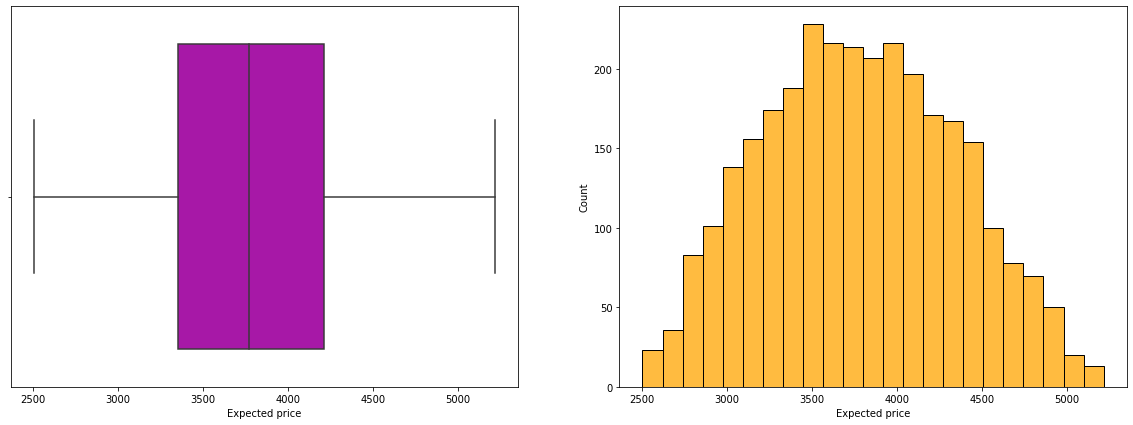

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Expected price"], ax =ax[1], color = "orange") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Expected price"], ax = ax[0], color = "m") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

From the box plot and hist plot we can make out that for the most of the houses on an avearge cost 3782.93

In [ ]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

Bivariate Analysis

Analysis of total rooms and Grade

Text(0.5, 1.0, 'Grade vs Trooms')

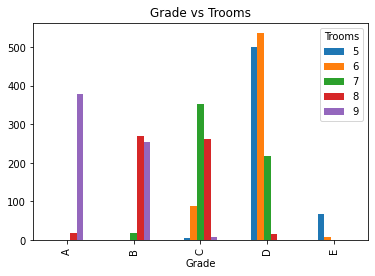

In [ ]:
pd.crosstab(df.Grade,df.Trooms).plot.bar()
plt.title("Grade vs Trooms")

Interpretation:

As the total no.of rooms increases the grade of the house also increases

Analysis of Nfloors and Grade

Text(0.5, 1.0, 'Grade vs Nfloors')

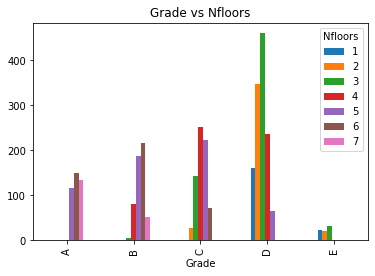

In [ ]:
pd.crosstab(df.Grade,df.Nfloors).plot.bar()
plt.title("Grade vs Nfloors")

Interpretation:

As the total no.of floors increases the grade of the house also increases

Analysis of total area and expected price

Text(0.5, 1.0, 'Grade vs Nbedrooms ')

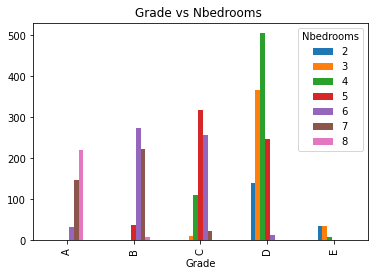

In [ ]:
pd.crosstab(df.Grade,df.Nbedrooms).plot.bar()
plt.title("Grade vs Nbedrooms ")

Interpretation:

As the total no.of Nbedrooms increases the grade of the house also increases

Feature Engineering

In [ ]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

Converting non-numeric(object) to categorical columns

In [ ]:
df['roof']=df['roof'].astype('category')
df['Grade']=df['Grade'].astype('category')

In [ ]:
df.dtypes

Id                   int64
Area(total)          int64
Trooms               int64
Nbedrooms            int64
Nbwashrooms          int64
Twashrooms           int64
roof              category
Roof(Area)           int64
Lawn(Area)           int64
Nfloors              int64
API                  int64
ANB                  int64
Expected price       int64
Grade             category
dtype: object

Converting categorical label to numeric using label encoder technique

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['roof']=label_encoder.fit_transform(df['roof'])

df['Grade']=label_encoder.fit_transform(df['Grade'])

In [ ]:
df.dtypes

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int64
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int64
dtype: object

Feature scaling

In [ ]:
def feature_scale(scale):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  new_df = df.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
  return df_scaled


In [ ]:
scale = 'minmax'
df1_scaled = feature_scale(scale)
df1_scaled

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.75
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944,0.75
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702,0.50
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301,0.75
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.998666,0.728571,1.00,0.666667,0.571429,0.625,1.0,0.791667,0.90,0.666667,0.833333,0.2,0.642330,0.25
2996,0.999000,0.028571,1.00,1.000000,0.857143,0.750,1.0,0.966667,0.34,1.000000,0.950000,0.6,0.460546,0.00
2997,0.999333,0.542857,0.50,0.333333,0.285714,0.375,0.0,0.000000,0.16,0.666667,0.916667,1.0,0.406711,0.75
2998,0.999667,0.042857,1.00,0.833333,0.857143,0.750,0.0,0.000000,0.16,1.000000,0.183333,0.4,0.624631,0.25


In [ ]:
corr_df=df1_scaled.corr()
corr_df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


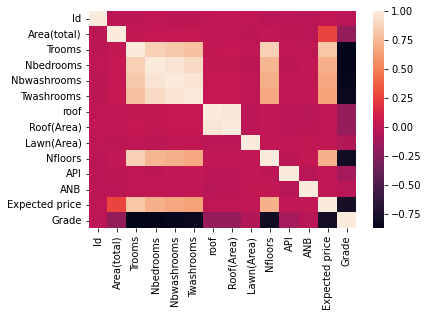

In [ ]:
sb.heatmap(corr_df)

Modelling - Logistic Regression

1) Split the data into train,test sets.

2) Logistic Regression - train the model and predict the outcome for the test data and calculate the accuracy of the training dataset

3) Test the accuracy of the model on the test data

Which factor seems to be most important one when decideing the grade of the house 

Preparation of training and testing dataset

In [ ]:
# Creating test and training dataset

df_train,df_test = train_test_split(df,train_size=0.8)

print("Size of the training dataset",df_train.shape)
print("Size of the testing dataset",df_test.shape)

Size of the training dataset (2400, 14)
Size of the testing dataset (600, 14)


In [ ]:
x_train = df_train.drop(columns='Grade',axis=1)
y_train = df_train['Grade']
x_test = df_test.drop(columns='Grade',axis=1)
y_test = df_test['Grade']
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2400, 13), (2400,), (600, 13), (600,))

2. Training the model

In [ ]:
logreg = LogisticRegression().fit(x_train,y_train)

# Using the trained model to predict the outcome of the x_test dataset
y_pred=logreg.predict(x_test)

# Calculating the accuracy of the training dataset

acc_log = round(logreg.score(x_train,y_train) * 100, 2)
acc_log

y_pred = logreg.predict(x_test)

# Calculating the accuracy of the training dataset

acc_log = round(logreg.score(x_train,y_train)*100,2)
acc_log

55.12

In [ ]:
# Indicate the value of the slope for each

df = pd.DataFrame(df_train.columns.delete(0))
df.columns=['Feature']
df['Correlation'] = pd.Series(logreg.coef_[0])

df.sort_values(by='Correlation',ascending = False)


,Feature,Correlation
7,Lawn(Area),0.010726
12,Grade,0.003216
4,Twashrooms,0.002335
5,roof,0.002156
3,Nbwashrooms,0.002105
9,API,0.001569
2,Nbedrooms,0.000904
6,Roof(Area),0.000109
0,Area(total),-0.000024
11,Expected price,-0.000406


In [ ]:
#model.intercept indicates the intercecpt with y-axis

logreg.intercept_

array([-1.51724493e-04, -9.23982553e-05, -7.20020895e-06,  1.87716347e-04,
        6.36066101e-05])

In [ ]:
#Evaluate the model on the test data

logreg.score(x_test,y_test)

0.5433333333333333

In [ ]:
np.unique(y_pred)

array([0, 1, 2, 3])

In [ ]:
from collections import Counter

x=0
d=Counter(y_pred)
print('{} has occured {} times'.format(x,d[x]))

0 has occured 51 times


Evaluation: Confusion matrix, ROC-AUC

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

#print("tn={},fp={},fn={},tp={}".format(tn,fp,fn,tp))

[[ 23  40  19   2   0]
 [ 19  49  25  12   0]
 [  9  29  31  66   0]
 [  0   9  31 223   0]
 [  0   0   1  12   0]]


In [ ]:
confusion_matrix(y_test,y_pred).ravel()
#tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

array([ 23,  40,  19,   2,   0,  19,  49,  25,  12,   0,   9,  29,  31,
        66,   0,   0,   9,  31, 223,   0,   0,   0,   1,  12,   0])

In [ ]:
np.diagonal(confusion_matrix(y_test,y_pred)) # True positives

array([ 23,  49,  31, 223,   0])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy',accuracy_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred,average='weighted'))
print('f1_score',f1_score(y_test,y_pred,average='weighted'))
print('precision_score',precision_score(y_test,y_pred,average='weighted'))

accuracy 0.5433333333333333
recall_score 0.5433333333333333
f1_score 0.5175002727009403
precision_score 0.5061560251413507


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Splitting the data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error,median_absolute_error
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


In [ ]:
x_train.head

<bound method NDFrame.head of         Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms  roof  \
509    510          311       9          8            7           8     0   
736    737          311       8          7            7           9     1   
1375  1376          321       9          6            6           8     0   
2393  2394          324       9          7            6           7     1   
2195  2196          307       6          3            2           3     1   
...    ...          ...     ...        ...          ...         ...   ...   
602    603          320       5          2            1           2     0   
2397  2398          341       7          5            5           7     1   
973    974          333       8          5            5           6     0   
787    788          302       5          4            4           5     1   
103    104          338       5          3            3           4     1   

      Roof(Area)  Lawn(Area)  Nfloors  API  A

Build the model(GaussianNB)

In [ ]:
# Fitting Naive Bayes to the Training set  
 
classifier = GaussianNB()  
classifier.fit(x_train, y_train) 

GaussianNB()

Predict Data

In [ ]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)  

Evaluate the Model

In [ ]:
# Making the Confusion Matrix  
 
cm = confusion_matrix(y_test, y_pred)  
cm

array([[ 71,  13,   0,   0,   0],
       [ 11,  83,  11,   0,   0],
       [  0,  23,  96,  16,   0],
       [  0,   0,  34, 221,   8],
       [  0,   0,   0,   4,   9]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))

accuracy: 0.8
recall: 0.8
f1-score: 0.8033796509363887
precision: 0.809897536419732


Modeling - Decision Tree Classifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7616666666666667


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 67,  17,   0,   0,   0],
       [ 10,  69,  26,   0,   0],
       [  0,   4, 125,   6,   0],
       [  0,   0,  67, 196,   0],
       [  0,   0,   0,  13,   0]])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))

accuracy: 0.7616666666666667
recall: 0.7616666666666667
f1-score: 0.7591863488499356
precision: 0.7845955091775446


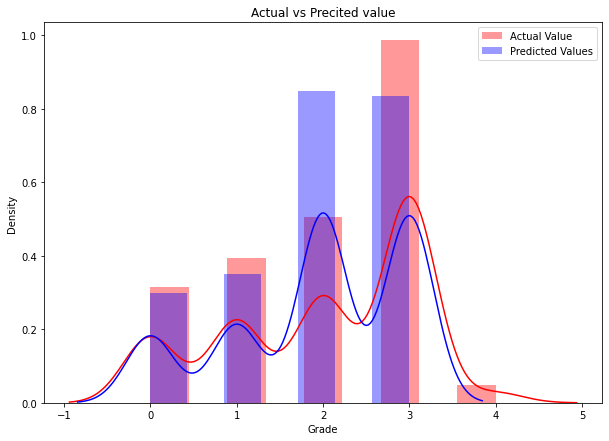

In [ ]:
plt.figure(figsize=(10, 7))
ax = sb.distplot(y_test, hist=True, color="r", label="Actual Value")
sb.distplot(y_pred, hist=True, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value')
plt.legend()
plt.show()

In [ ]:
Result_df = pd.DataFrame({"Models":["Logistic Regression","GaussianNB","RandomForestClassifier"],"Accuracy":[0.53,0.805,0.74],"precision":[0.497,0.813,0.735],"Recall":[0.533,0.805,0.74],"f1":[0.508,0.806,0.720]})

In [ ]:
Result_df

,Models,Accuracy,precision,Recall,f1
0,Logistic Regression,0.530,0.497,0.533,0.508
1,GaussianNB,0.805,0.813,0.805,0.806
2,RandomForestClassifier,0.740,0.735,0.740,0.720


Conclusion:

GaussianNB performs better than Logistic Regression and RandomForestClassifier as it has high accuracy score 0.80 as compared to other models.